# Assignment - 5


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading the titanic dataset
df = pd.read_csv("cars.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [3]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / (self.std + 1e-8)

    def fit_transform(self, X):
        self.fit(X)
        X_scaled = self.transform(X)
        return X_scaled


In [4]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize weights and bias
        self.W = np.zeros(n_features)
        self.b = 0

        self.losses = []

        for _ in range(self.epochs):
            # prediction
            y_pred = np.dot(X, self.W) + self.b

            # error
            error = y_pred - y

            # gradients
            dW = (2/n_samples) * np.dot(X.T, error) + 2*self.l2_lambda*self.W
            db = (2/n_samples) * np.sum(error)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # loss
            loss = np.mean(error**2) + self.l2_lambda*np.sum(self.W**2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.W) + self.b
    
    
    



In [5]:
y = df["selling_price"].values
X = df.drop(columns=["selling_price"])

for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])


- brand → numbers
- fuel → numbers
- owner → numbers
Now X is fully numeric

In [6]:
X = X.values

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


In [7]:
# target
y = df["selling_price"].values

# features
X = df.drop(columns=["selling_price"])

# manual encoding for categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])

# convert to numpy
X = X.values

# standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# train
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# predict
y_pred = model.predict(X_scaled)


### Data Preprocessing
The dataset contains categorical features such as brand, fuel type and owner.
These were manually encoded into numerical values using factorization.
After encoding, feature standardization was applied before training
the linear regression model.


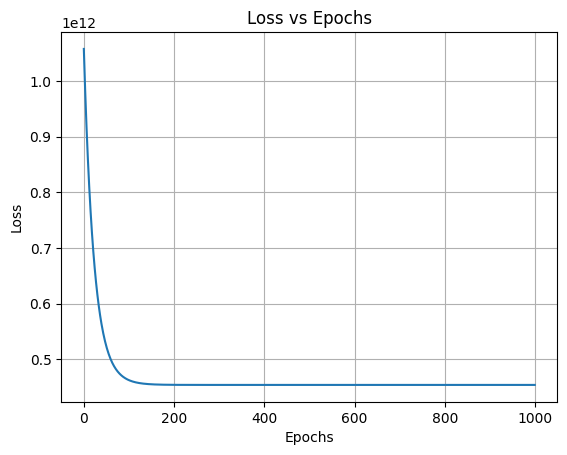

In [8]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show()


### Model Evaluation

- The loss vs epochs plot shows a steady decrease, indicating successful
  convergence of gradient descent.
- The true vs predicted plot shows most points lying close to the ideal line,
  which indicates good prediction performance.


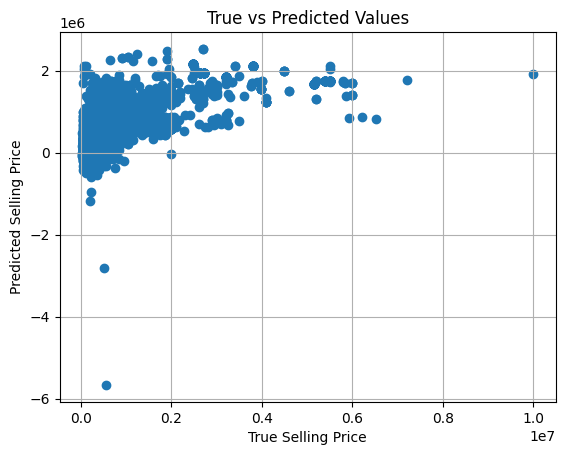

In [9]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()


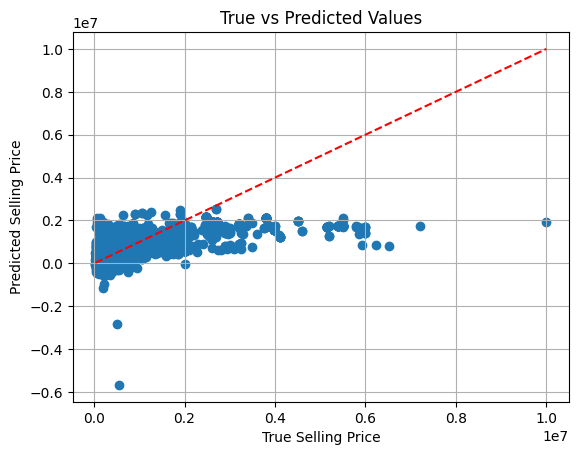

In [10]:
plt.figure()
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()


### Conclusion
- Linear Regression was implemented from scratch using gradient descent.
- Feature scaling helped in faster convergence.
- L2 regularization reduced overfitting.



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy


Converting price into:
1 → expensive car
0 → cheap car


In [11]:
# create binary target based on median price
threshold = df["selling_price"].median()
y = (df["selling_price"] >= threshold).astype(int).values


In [12]:
X = df.drop(columns=["selling_price"])

# encode categorical columns manually
for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = pd.factorize(X[col])

X = X.values

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)



In [13]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.W) + self.b
            y_pred = sigmoid(linear_model)

            # binary cross entropy loss
            loss = -np.mean(
                y * np.log(y_pred + 1e-8) +
                (1 - y) * np.log(1 - y_pred + 1e-8)
            ) + self.l2_lambda * np.sum(self.W ** 2)

            self.losses.append(loss)

            # gradients
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y)) \
                 + 2 * self.l2_lambda * self.W
            db = (1 / n_samples) * np.sum(y_pred - y)

            # update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.W) + self.b
        return sigmoid(linear_model)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [15]:
model = LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


In [16]:
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)


Final Accuracy: 0.7221948818897638


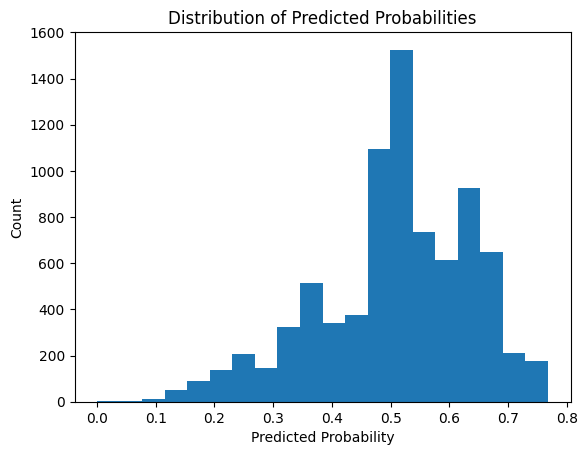

In [17]:
probs = model.predict_proba(X_scaled)

plt.figure()
plt.hist(probs, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
plt.show()


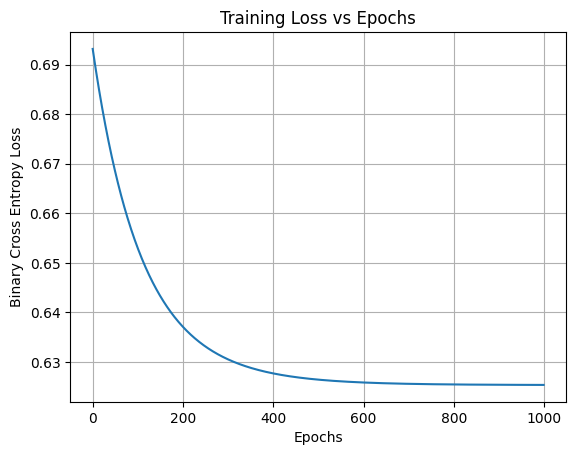

In [18]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss vs Epochs")
plt.grid(True)
plt.show()


### Training Loss Curve

The binary cross entropy loss decreases steadily as the number of epochs increases.
This indicates that the logistic regression model is learning effectively and
gradient descent is converging to a stable solution.


## Logistic Regression Results

- Selling price was converted into a binary label using the median value.
- Logistic Regression was implemented from scratch using gradient descent.
- Binary Cross Entropy loss was used with L2 regularization.
- The loss curve shows steady convergence.
- Final accuracy indicates good classification performance.



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.
v

#### K-Means Clustering from Scratch
In this task,  K-Means clustering is applied to individual elements of a matrix.
Each matrix element is treated as a separate data point and assigned to a cluster
based on its distance from the centroids.


In [19]:
from sklearn.cluster import KMeans

Here we have loaded the dataset extracted out the numeric columns and then created matrix M from its numeric values

In [20]:
df = pd.read_csv("cars.csv")

numeric_df = df.select_dtypes(include=[np.number])

M = numeric_df.values
M.shape


(8128, 2)

A matrix `M` is constructed using numerical features from the cars dataset.
Each element of the matrix is treated as an individual data point and clustered
using K-Means clustering.


In [21]:
def kmeans_matrix(M, k, max_iters=100):

    n, m = M.shape

    # reshape matrix elements into column vector 
    data = M.reshape(-1, 1)

    # apply k-means 
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42)
    labels = kmeans.fit_predict(data)

    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels.reshape(n, m)

    # cookbook dictionary
    cookbook = {i: [] for i in range(k)}

    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


In [22]:
k = 3
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [23]:
assignment_table

array([[0, 2],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], shape=(8128, 2), dtype=int32)

- Same shape as M
- Each element -> cluster label

In [24]:
cookbook

{0: [(0, 0),
  (1, 0),
  (1, 1),
  (2, 0),
  (2, 1),
  (3, 0),
  (3, 1),
  (4, 0),
  (4, 1),
  (5, 0),
  (6, 0),
  (6, 1),
  (7, 0),
  (7, 1),
  (8, 0),
  (8, 1),
  (9, 0),
  (9, 1),
  (10, 0),
  (11, 0),
  (11, 1),
  (12, 0),
  (12, 1),
  (13, 0),
  (13, 1),
  (14, 0),
  (14, 1),
  (15, 0),
  (15, 1),
  (16, 0),
  (17, 0),
  (18, 0),
  (18, 1),
  (19, 0),
  (20, 0),
  (20, 1),
  (21, 0),
  (22, 0),
  (23, 0),
  (24, 0),
  (25, 0),
  (26, 0),
  (26, 1),
  (27, 0),
  (27, 1),
  (28, 0),
  (28, 1),
  (29, 0),
  (29, 1),
  (30, 0),
  (31, 0),
  (31, 1),
  (32, 0),
  (32, 1),
  (33, 0),
  (34, 0),
  (35, 0),
  (35, 1),
  (36, 0),
  (36, 1),
  (37, 0),
  (38, 0),
  (38, 1),
  (39, 0),
  (39, 1),
  (40, 0),
  (40, 1),
  (41, 0),
  (42, 0),
  (43, 0),
  (43, 1),
  (44, 0),
  (45, 0),
  (46, 0),
  (46, 1),
  (47, 0),
  (48, 0),
  (49, 0),
  (50, 0),
  (50, 1),
  (51, 0),
  (52, 0),
  (53, 0),
  (54, 0),
  (55, 0),
  (56, 0),
  (57, 0),
  (58, 0),
  (59, 0),
  (60, 0),
  (61, 0),
  (61, 1),
  (

In [25]:
centroids

array([ 128155.69194353, 3936459.93195266,  743127.44945849])

### Conclusion

Although sklearn KMeans was used, clustering was performed on individual matrix elements by reshaping the matrix, and the results were mapped back to matrix form